In [1]:
import pandas as pd
import numpy as np #9
import matplotlib.pyplot as plt #9
from sklearn.model_selection import train_test_split #4
from sklearn.preprocessing import StandardScaler #5
from sklearn.linear_model import LinearRegression #6 & #9
from sklearn.metrics import mean_squared_error #6 & #7
from sklearn.tree import DecisionTreeRegressor  #7
from sklearn.ensemble import RandomForestRegressor #8

# Ignore printing warnings for general readability
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Making a list of missing value types
missing_values = ["n/a", "na", "--", "...", "NaN"]

# 1. # Read the Excel file using the specified engine and convert to CSV
data = pd.read_excel('1553768847_housing.xlsx', na_values=missing_values)
data.to_csv('1553768847_housing.csv', index=False)
data.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [4]:
# 2. Handle missing values by filling with column mean
data_filled = data.fillna(data.mean())

In [5]:
#Identify the data variables which are categorical
#Categorical(classified as strings or integers) columns can be further classified into:
#-nominal(no inherent order/ranking since no specific order)
#-ordinal variables (specific order/ranking) or satisfaction ratings (e.g., low < medium < high)

#Continuous any numerical value(float/int) within a specific range(eg:fractional or decimal values/ ie: age, height, weight, or temperature)
Categorical_Columns = []
Numerical_Columns = []
for column in data_filled.columns:
    if len(data_filled[column].unique()) <= 8:
        Categorical_Columns.append(column)
    else:
        Numerical_Columns.append(column)

print("\n Categorical Variables are : " , Categorical_Columns)
print(" \n Numerical Variables are : " , Numerical_Columns)


 Categorical Variables are :  ['ocean_proximity']
 
 Numerical Variables are :  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


In [6]:
# 3. Encode categorical data: Convert categorical columns to numerical data
data_encoded = pd.get_dummies(data_filled, columns=['ocean_proximity'])

# Display the first few rows of the encoded dataset
data_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [7]:
# Split the dataset into features (X) and target variable (y)
X = data_encoded.drop('median_house_value', axis=1)
y = data_encoded['median_house_value']

#4. Split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#5. Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
#6. Perform Linear Regression
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test_scaled)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 70031.41991955665


In [15]:
#7. Perform Decision Tree Regression model
tree_reg_model = DecisionTreeRegressor()

# Fit the model on the training data
tree_reg_model.fit(X_train_scaled, y_train)

# Predict output for the test dataset
y_pred_tree = tree_reg_model.predict(X_test_scaled)

# Calculate Root Mean Squared Error (RMSE) for Decision Tree Regression
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)

print(f"RMSE (root mean squared error) from Random Forest Regression: {rmse_tree}")

RMSE (root mean squared error) from Random Forest Regression: 69228.49061115789


In [14]:
#8. Perform Random Forest Regression model
forest_reg_model = RandomForestRegressor()

# Fit the model on the training data
forest_reg_model.fit(X_train_scaled, y_train)

# Predict output for the test dataset
y_pred_forest = forest_reg_model.predict(X_test_scaled)

# Calculate Root Mean Squared Error (RMSE) for Random Forest Regression
rmse_forest = mean_squared_error(y_test, y_pred_forest, squared=False)

print(f"Random Forest Regression RMSE: {rmse_forest}")

Random Forest Regression RMSE: 48884.92495518843


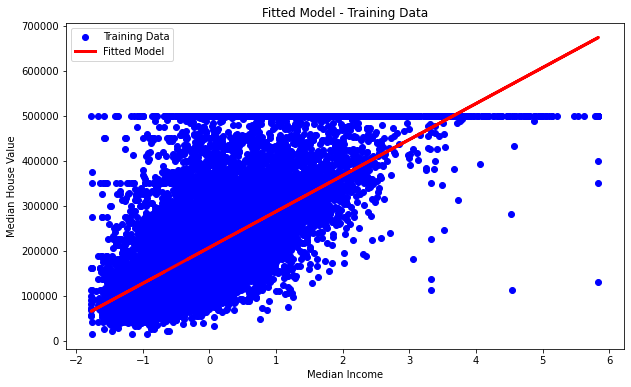

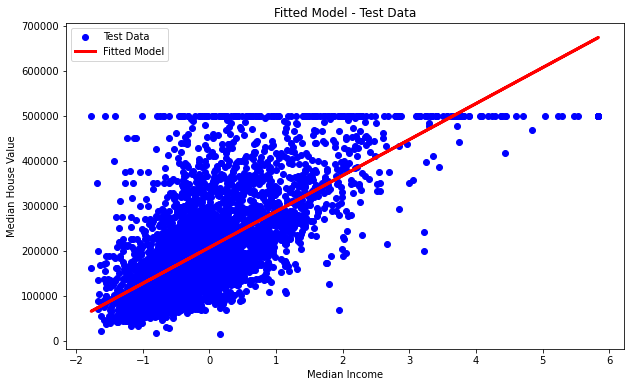

In [16]:
#9. Plot the fitted model for test data
# Extract just the median_income column
X_train_median_income = X_train_scaled[:, X_train.columns.get_loc('median_income')]
X_test_median_income = X_test_scaled[:, X_test.columns.get_loc('median_income')]

# Reshape the data to fit the model
X_train_median_income = X_train_median_income.reshape(-1, 1)
X_test_median_income = X_test_median_income.reshape(-1, 1)

# Initialize Linear Regression model
linear_reg_single_var = LinearRegression()

# Fit the model on the training data
linear_reg_single_var.fit(X_train_median_income, y_train)

# Predict output for the test dataset
y_pred_single_var = linear_reg_single_var.predict(X_test_median_income)

# Plot the fitted model for training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train_median_income, y_train, color='blue', label='Training Data')
plt.plot(X_train_median_income, linear_reg_single_var.predict(X_train_median_income), color='red', linewidth=3, label='Fitted Model')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Fitted Model - Training Data')
plt.legend()
plt.show()

# Plot the fitted model for test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test_median_income, y_test, color='blue', label='Test Data')
plt.plot(X_test_median_income, y_pred_single_var, color='red', linewidth=3, label='Fitted Model')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Fitted Model - Test Data')
plt.legend()
plt.show()